In [20]:
import torch
path_train = '../miniproject_dataset/train_data.pkl'
path_val = '../miniproject_dataset/val_data.pkl'

# 2 tensors of size 50000 x 3 x H x W
# denoise model with this data
noisy_imgs_1, noisy_imgs_2 = torch.load(path_train)
noisy_imgs_1 = noisy_imgs_1[0:1000]
noisy_imgs_2 = noisy_imgs_2[0:1000]
# Track the progress with this data
noisy_imgs , clean_imgs = torch.load(path_val)
print(noisy_imgs_1.size())
print(noisy_imgs_2.size())
print(noisy_imgs.size())

print(clean_imgs.size())



torch.Size([1000, 3, 32, 32])
torch.Size([1000, 3, 32, 32])
torch.Size([1000, 3, 32, 32])
torch.Size([1000, 3, 32, 32])


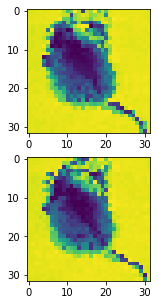

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = [10, 5])
plt.subplot(2,1,1)
plt.imshow(noisy_imgs_1[100,0]);
plt.subplot(2,1,2)
plt.imshow(noisy_imgs_2[100,0]);

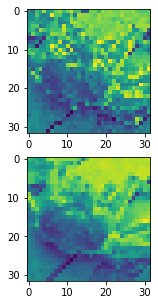

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = [10, 5])
plt.subplot(2,1,1)
plt.imshow(noisy_imgs[0,0]);
plt.subplot(2,1,2)
plt.imshow(clean_imgs[0,0]);

The goal is to find a model $\phi$:
$$\phi(\hat{X}) = X$$
Quadratic loss: 
$$\hat{w} = argmin \frac{1}{N} \sum_{n=1}^N || x_n - \phi(x_n + \epsilon_n;w) || ^2$$
* $x_n$: data samples
* $\epsilon_n$ : gaussian noise

100%|██████████| 10/10 [00:03<00:00,  2.84it/s]


AttributeError: 'tuple' object has no attribute 'size'

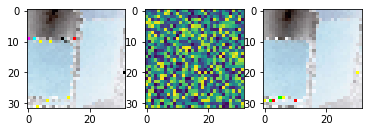

In [31]:
from torch import nn
from tqdm import tqdm


model_old = nn.Sequential(
    
    nn.Linear(32, 100),
    nn.ReLU(),
    nn.Linear(100,32)
)
model = nn.Sequential(
    nn.Conv2d(3, 32, 3),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3),
    nn.ReLU(),    
    nn.Conv2d(32, 8, 3),
    nn.ReLU(),
    nn.ConvTranspose2d(8, 32, 3)
    nn.ReLU(),
    nn.ConvTranspose2d(32, 32, 3)
    nn.ReLU(),
    nn.ConvTranspose2d(32, 32, 3)
    nn.ReLU(),
    nn.ConvTranspose2d(32, 3, 3)
    nn.ReLU(),
    nn.ConvTranspose2d(9, 3, 3)
)
from PIL import Image
import torch 
import torchvision 
import torchvision.transforms as T 
from PIL import Image

transform = T.ToPILImage()

batch_size, nb_epochs = 100, 10
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
mse = nn.MSELoss()

for e in tqdm(range(nb_epochs)):
    input = noisy_imgs_1.type(torch.float).split(batch_size)
    target = noisy_imgs_2.type(torch.float).split(batch_size)
    for i in range(len(input)):
        output = model(input[i])
        
        loss = mse(output[i], target[i])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(transform(input[i][0]))
plt.subplot(1, 3, 2)
plt.imshow(transform(output[i][0]))
plt.subplot(1, 3, 3)
plt.imshow(transform(target[i][0]))

print(output.size(), target.size())

